Import all modules 

In [1]:
from db_utils import RDSDatabaseConnector, load_data_from_csv
from DataFormat import DataFormat
from DataFrameInfo import DataFrameInfo
from DataTransform import DataFrameTransform
from Plotter import Plotter


Load data and determine data types and null percentages

In [2]:
#Load Data
df = load_data_from_csv('C:\\Users\\Gurpr\\OneDrive\\Documents\\AI Core\\Exploratory Data Analysis - Customer Loans in Finance\\Data\\output_loan_data.csv')

#Information about dataset
DF_Info = DataFrameInfo(df)

print(DF_Info.get_shape())
print(DF_Info.df.dtypes)


Dataframe Shape:
(54231, 43)
id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    in

                                % Null
funded_amount                 5.544799
term                          8.799395
int_rate                      9.531449
employment_length             3.905515
mths_since_last_delinq       57.166565
mths_since_last_record       88.602460
last_payment_date             0.134609
next_payment_date            60.127971
last_credit_pull_date         0.012908
collections_12_mths_ex_med    0.094042
mths_since_last_major_derog  86.172116


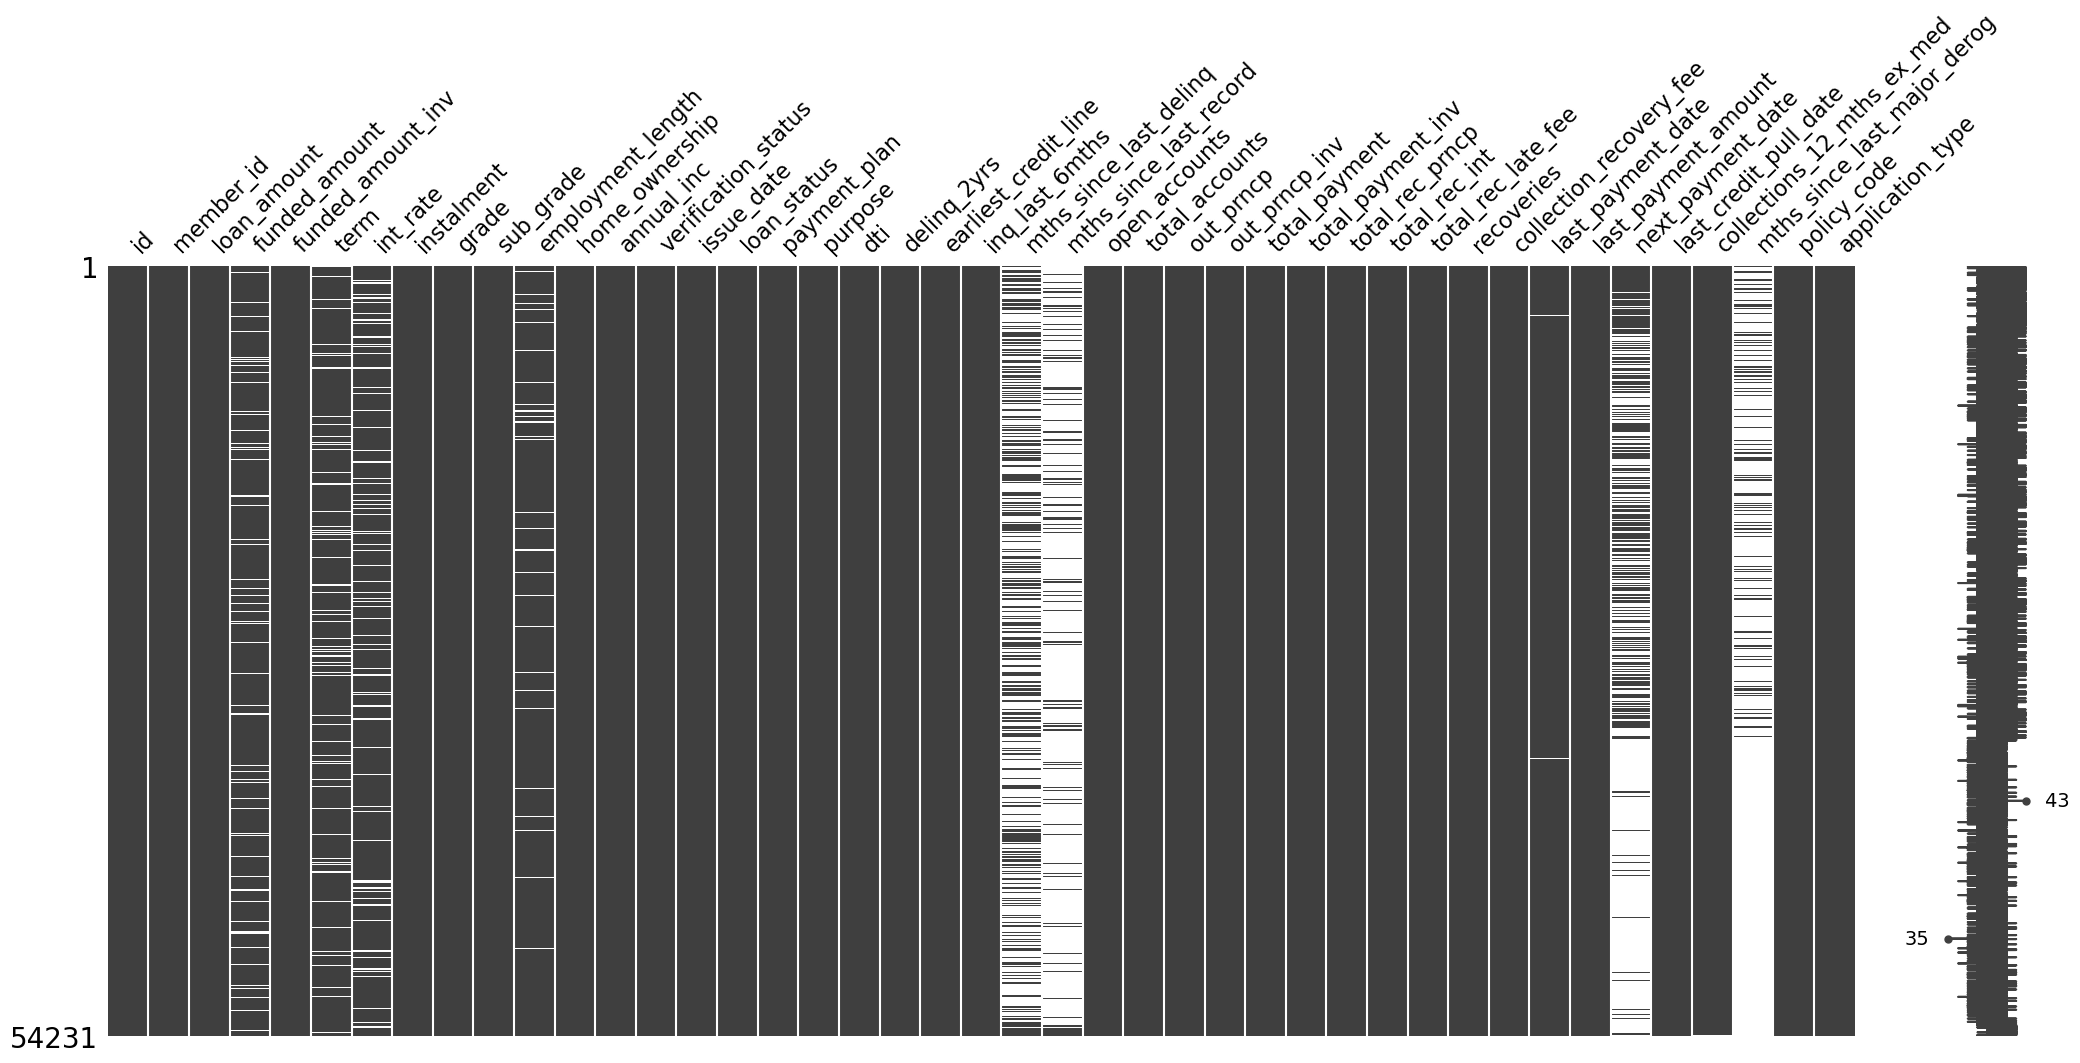

In [3]:
#Information about Null percentages
print(DF_Info.null_percentage())

plt = Plotter(df)
plt.missing_nulls_plot()


Converting columns to a more appropriate format and dropping columns

In [4]:
#Create an instance of the DataFormat Class
DF_Format = DataFormat(df)

#After looking at the data, some column types can be changed. Payment plan can be chnaged to a boolean type
DF_Format.string_to_boolean('payment_plan')

#These are simply dates in string format, converting them to datetime alows for easier analysis 
string_dates = ['issue_date', 'earliest_credit_line', 'last_credit_pull_date', 'last_payment_date']

#These columns columns all have a limited range of data so they can be converted into categpries
categories = ['grade', 'sub_grade', 'home_ownership',
                  'verification_status', 'loan_status', 'purpose']

DF_Format.strings_to_dates(string_dates)
DF_Format.values_to_categories(categories)

#Dropping columns with a high Null percentage:

drop_cols = ['policy_code', 'out_prncp_inv', 'total_payment_inv', 'id', 'next_payment_date']
DF_Format.drop_columns(drop_cols)


[ True]


Imputing Data

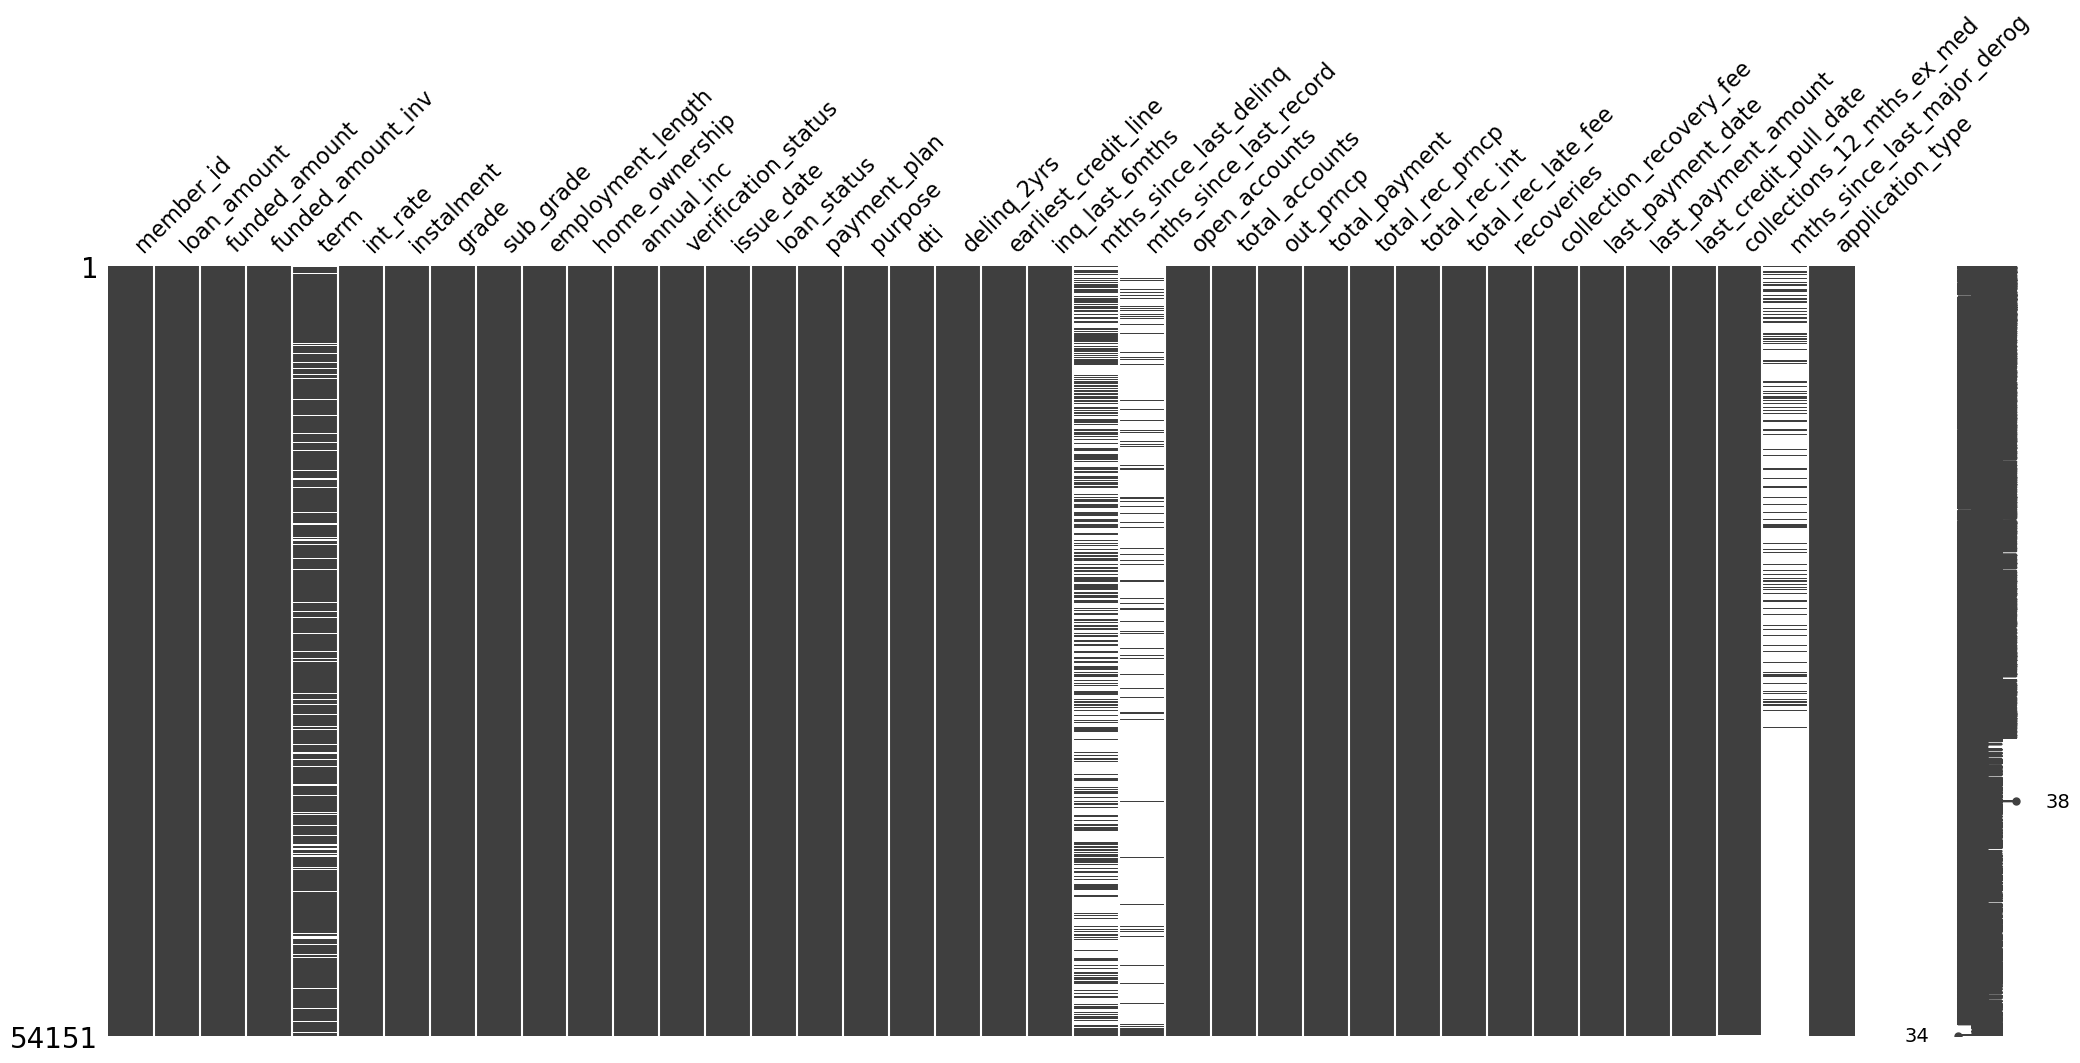

In [7]:
#Impute 

Transform_Formatted_data = DataFrameTransform(DF_Format.df)

# Assume When Employment length is missing it means they don't have a job
#Transform_Formatted_data.impute_empty_with_nan()
Transform_Formatted_data.impute_with_zero(['employment_length'])
# mean interest rate since its within normal dist
Transform_Formatted_data.impute_with_median(['int_rate', 'funded_amount'])

# these rows have insignificant null vals
Transform_Formatted_data.drop_null_rows(['last_payment_date', 'last_credit_pull_date'])

#Saving the formatted data

plt1 = Plotter(Transform_Formatted_data.df)
plt1.missing_nulls_plot()

RDSDatabaseConnector.save_data_to_csv(Transform_Formatted_data.df, 'Formatted_loan_data.csv')

Skewness

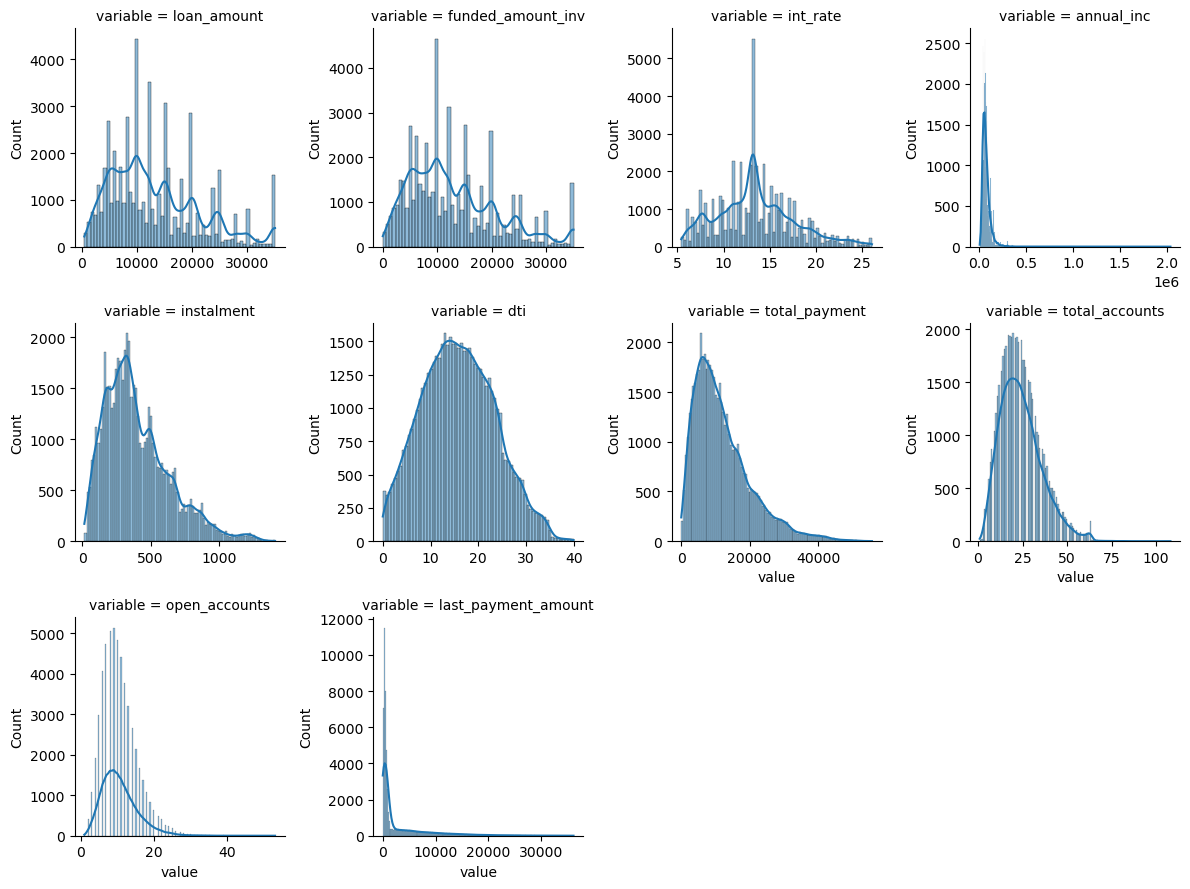

-------------------  --------
loan_amount          0.804922
funded_amount_inv    0.813376
int_rate             0.45662
annual_inc           8.7175
instalment           0.996572
dti                  0.189101
total_payment        1.26988
total_accounts       0.77904
open_accounts        1.05918
last_payment_amount  2.49722
-------------------  --------


In [8]:
#We will measure the skewness of the numerical columns 

numerical_cols = ['loan_amount','funded_amount_inv', 'int_rate', 'annual_inc', 'instalment', 'dti', 'total_payment', 'total_accounts', 'open_accounts', 'last_payment_amount']

plt.multiple_histogram_plot(numerical_cols)
DF_Info.data_skew(numerical_cols)

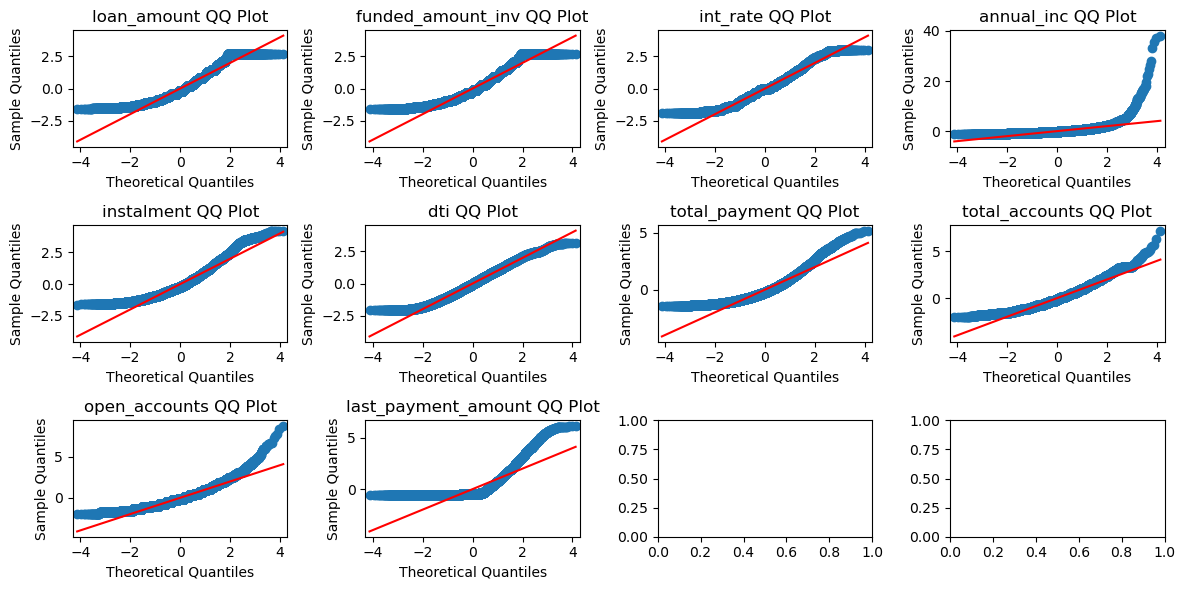

In [9]:
plt.multiple_qq_plot(numerical_cols)

Df_Info = DataFrameInfo(Transformed_and_Formatted_DF.df)

right_skewed_cols = ['annual_inc', 'total_payment', 'total_accounts',
                     'last_payment_amount', 'open_accounts', 'instalment', 'funded_amount_inv']

-------------------  ----------
loan_amount          -0.0430778
funded_amount_inv    -0.0524011
int_rate             -0.0133528
annual_inc            0.139203
instalment           -0.0207124
dti                  -0.125717
total_payment        -0.0138147
total_accounts       -0.678136
open_accounts        -0.4709
last_payment_amount   0.128038
-------------------  ----------


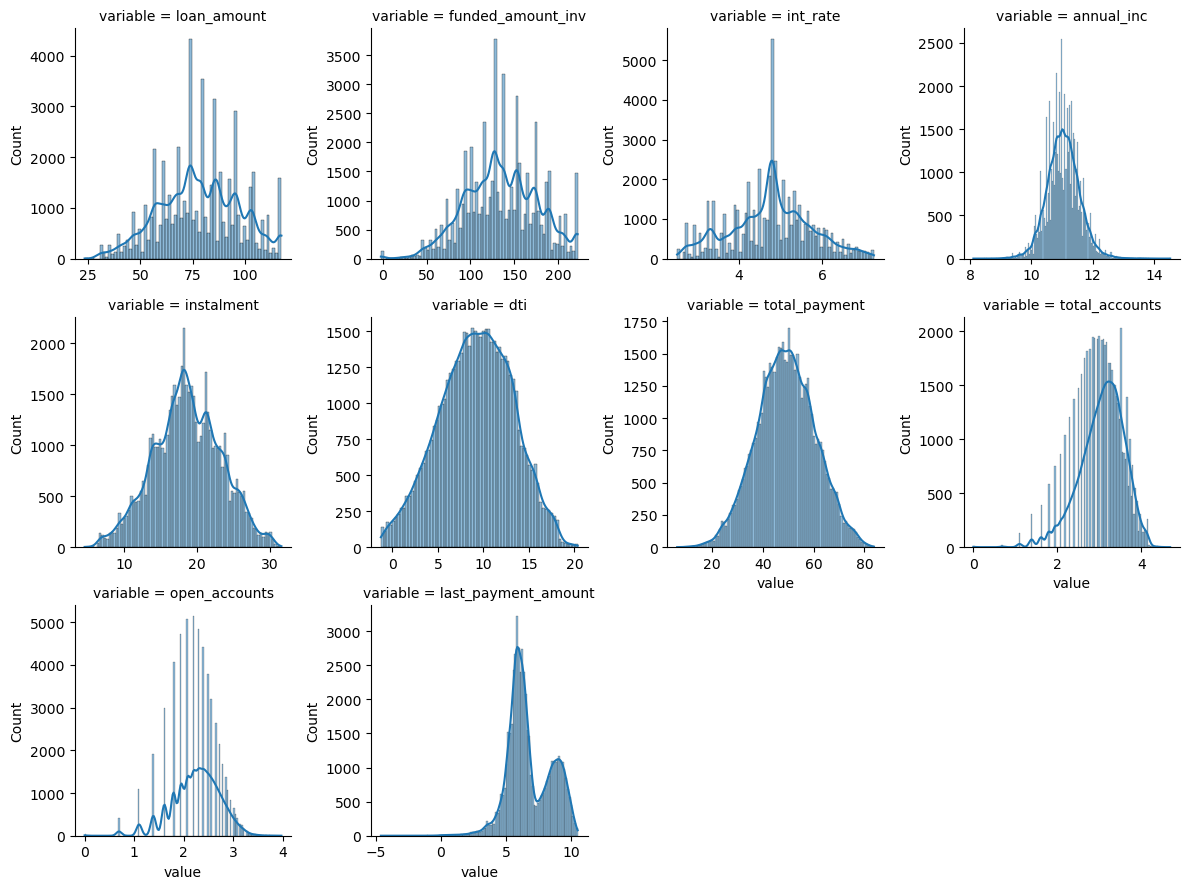

In [10]:

Box_cox_transfrom_columns=  ['loan_amount', 'instalment', 'int_rate', 'dti','funded_amount_inv', 'total_payment']
Log_transform_columns = ['annual_inc', 'total_accounts',
                      'open_accounts', 'last_payment_amount']

Transformed_and_Formatted_DF.box_cox_transform(Box_cox_transfrom_columns)
Transformed_and_Formatted_DF.log_transform(Log_transform_columns)

Df_Info.data_skew(numerical_cols)
plt.multiple_histogram_plot(numerical_cols)